In [ ]:
# import the necessary packages
from skimage.metrics import structural_similarity
from google.colab.patches import cv2_imshow
import numpy as np
import imutils
import cv2

In [ ]:
image_one = cv2.imread("/content/colorball.jpg")
image_two = cv2.imread("/content/level2_output.jpg")
gray1 = cv2.cvtColor(image_one, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image_two, cv2.COLOR_BGR2GRAY)

In [ ]:
# Compute the Structural Similarity Index (SSIM) between the two images, 
# ensuring that the difference image is returned
(score, diff) = structural_similarity(gray1,gray2,full=True)
diff = (diff*255).astype("uint8")

In [ ]:
# threshold the difference image
# find contours to get the regions of the two input images that differ 
thresh = cv2.threshold(diff,0,128, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU) [1]
cnts = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

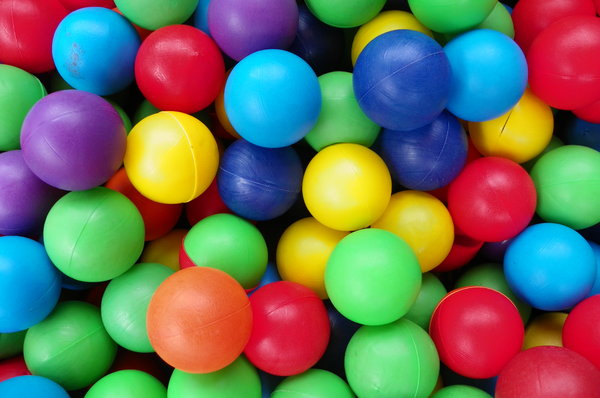

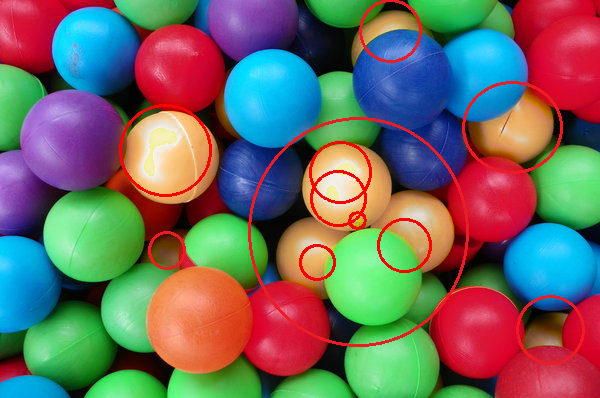

-1

In [6]:
# loop over the contours
for c in cnts:
    # compute the bounding box of the contour and then draw the 
    # bounding box on both input images to represent where the two 
    # images differ
    (x,y,w,h)=cv2.boundingRect(c)
    x1=int(x+w/2)
    y1=int(y+h/2)
    r=int(1/2*np.sqrt(w*w+h*h))
    if cv2.contourArea(c) >50:
      cv2.circle(image_two,(x1,y1),r,(0,0,255),2) 
# show the output images
cv2_imshow(image_one)
cv2_imshow(image_two)
cv2.waitKey(0)